In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, plot_confusion_matrix

In [ ]:
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ebayAuctions.xlsx to ebayAuctions.xlsx


In [ ]:
df=pd.read_excel("ebayAuctions.xlsx",   sheet_name='eBay auctions', header=0)

In [ ]:
df.head(5)

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [ ]:
df.shape

(1972, 8)

In [ ]:
#no missing values found
df.isna().sum()

Category        0
Currency        0
sellerRating    0
Duration        0
endDay          0
ClosePrice      0
OpenPrice       0
Competitive?    0
dtype: int64

In [ ]:
#Balance Data?
target = df['Competitive?']
target.value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

Text(0, 0.5, 'Counts')

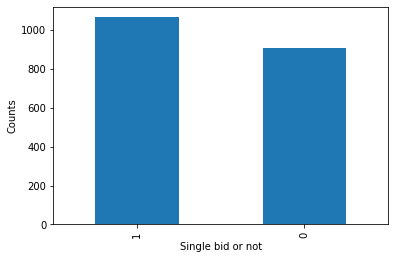

In [ ]:
target.value_counts().plot(kind='bar')
plt.xlabel('Single bid or not')
plt.ylabel('Counts')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


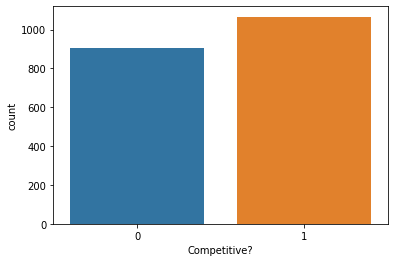

In [ ]:
ax = sns.countplot(target)

In [ ]:
#one hot encoding categorical variables
dummy_vars = ['Category', 'Currency','endDay','Duration']
df_tree = pd.get_dummies(df,prefix=dummy_vars, columns=dummy_vars)

In [ ]:
df_tree.head(5)

,sellerRating,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,endDay_Fri,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,3249,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# no additional preprocessing

In [ ]:
# train test split
x = df_tree.loc[:,df_tree.columns != 'Competitive?']
y = df_tree.loc[:,df_tree.columns == 'Competitive?']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=7)

# **First Model**

In [ ]:
# build dt model with min split = 50
# cross validate?
dt1 = DecisionTreeClassifier(min_samples_split=50, random_state=7)

In [ ]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [ ]:
y_pred = dt1.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8593155893536122


In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[321,  51],
       [ 60, 357]])

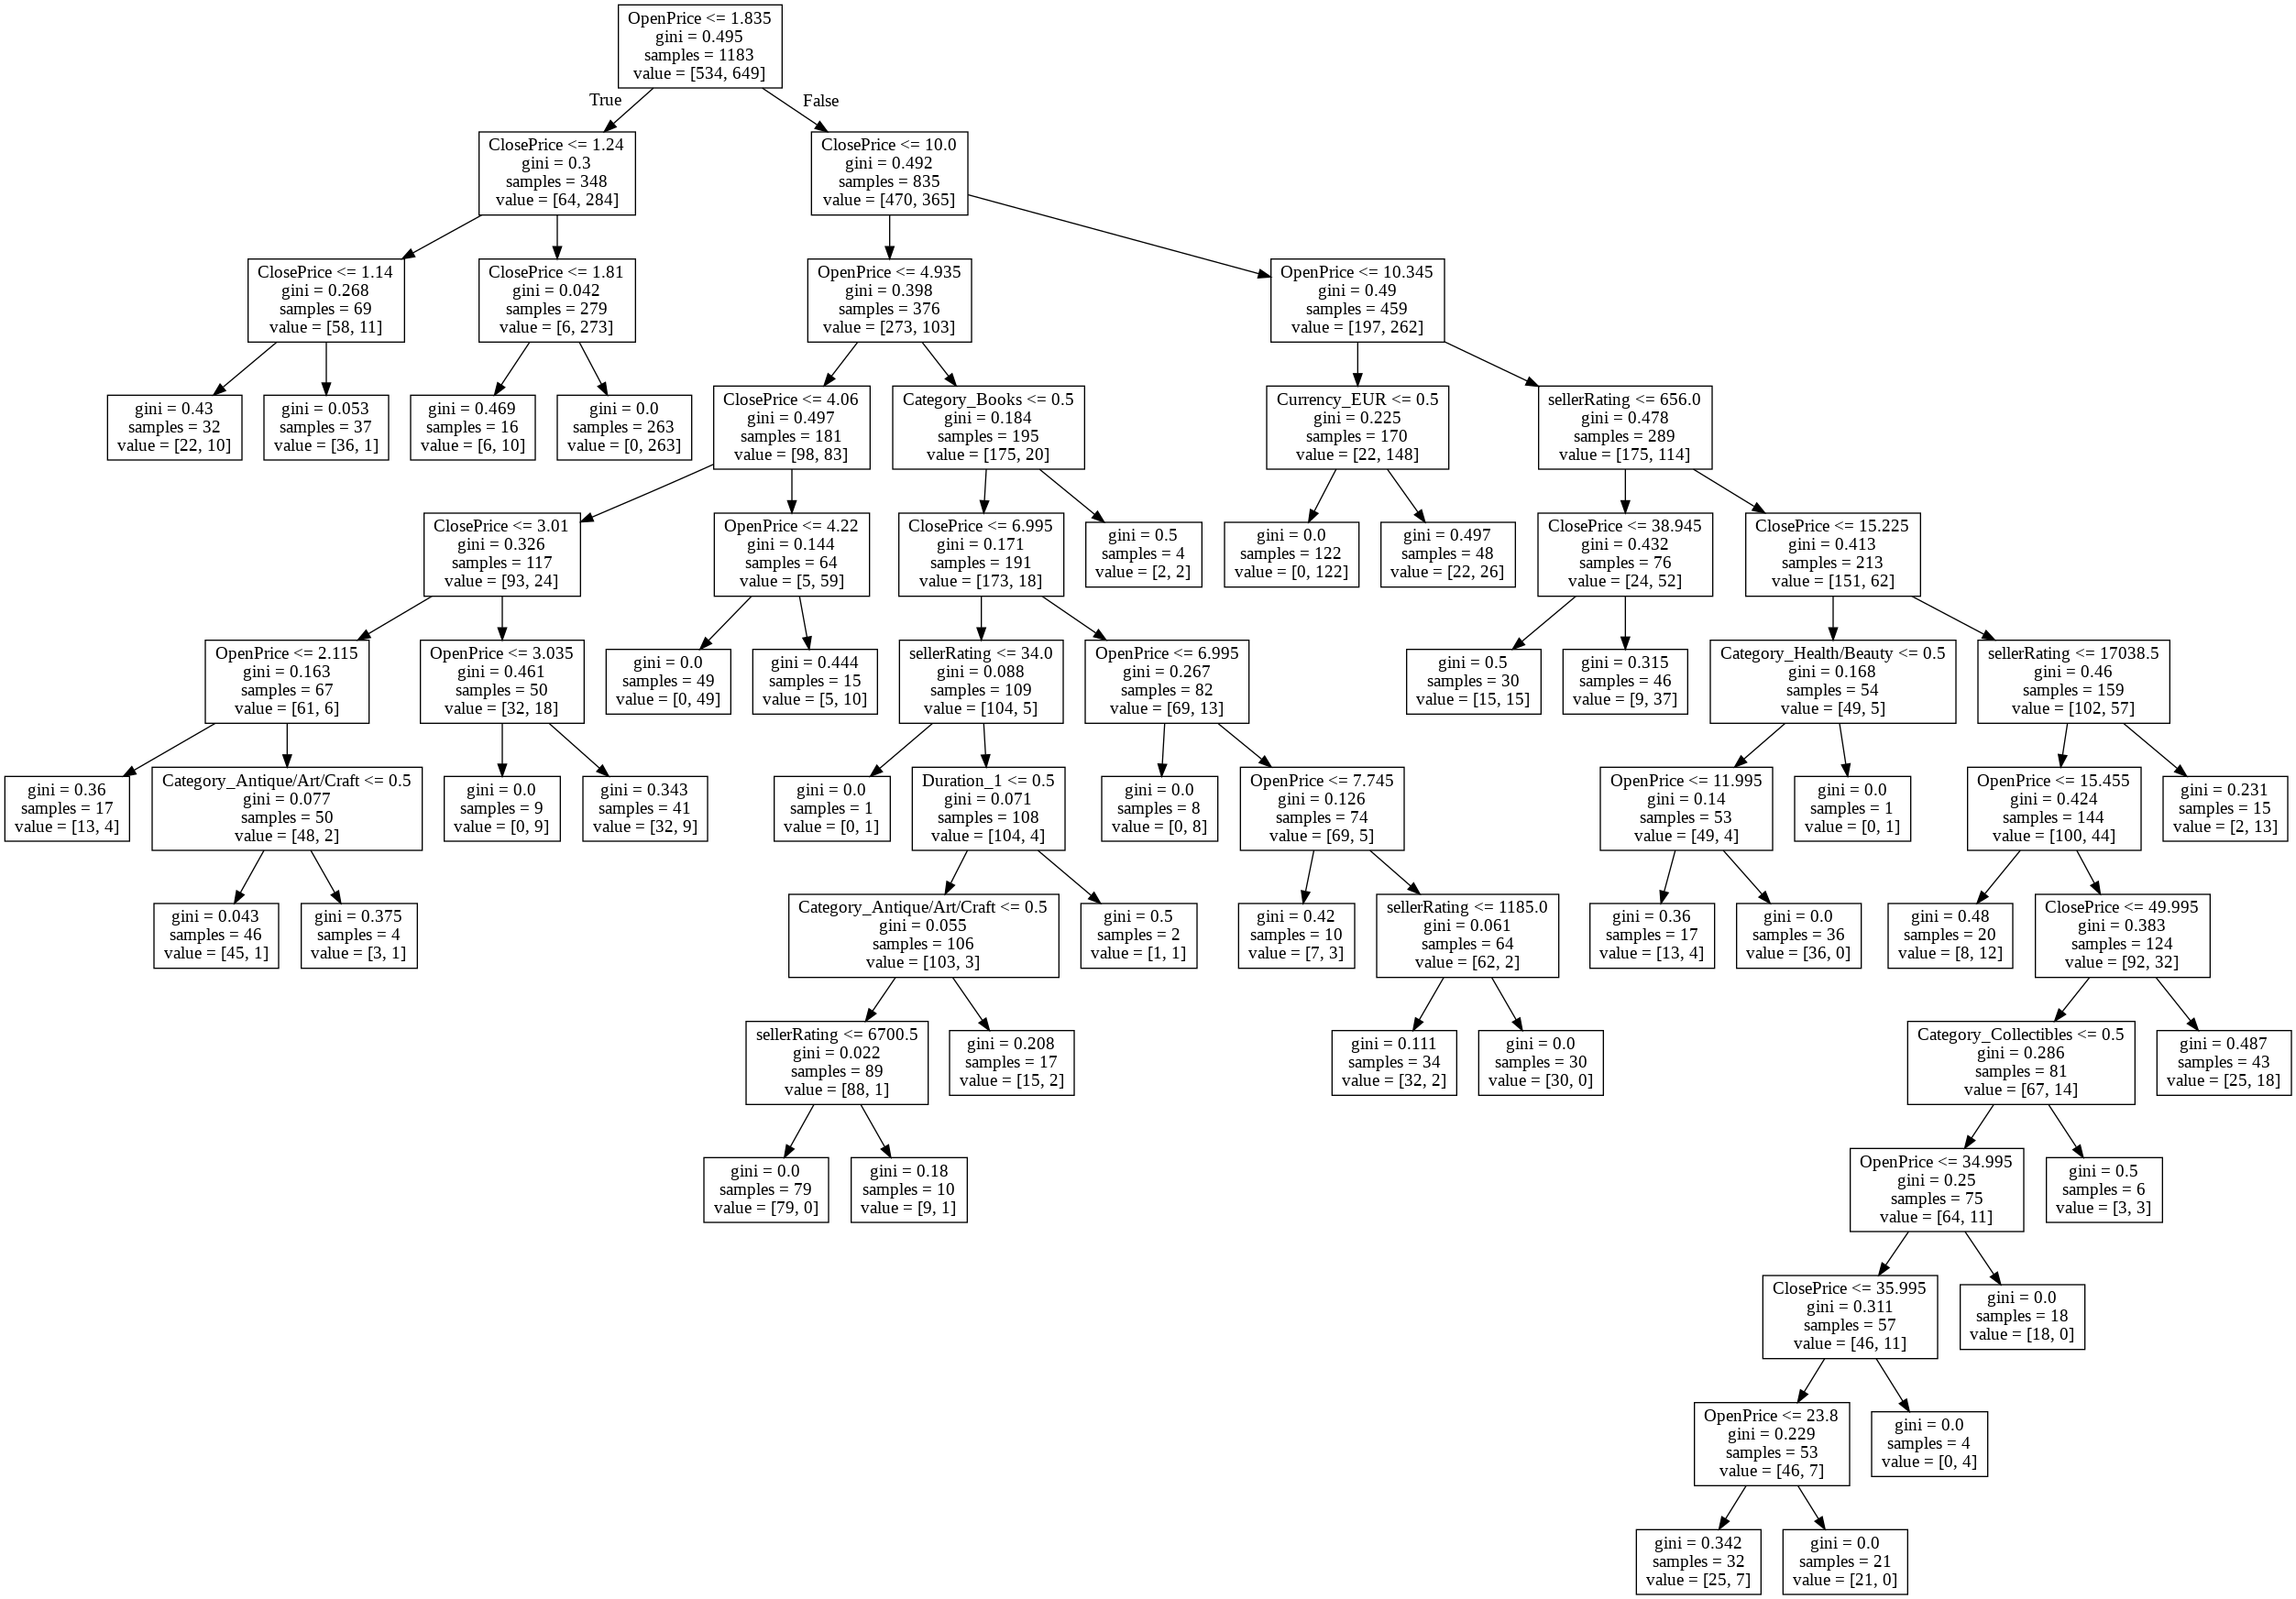

In [ ]:
dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data, feature_names = x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auctionTree1.png')
Image(graph.create_png())

In [ ]:
dt1.tree_.max_depth

12

In [ ]:
dt1.tree_.node_count

71

In [ ]:
#feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(dt1.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
1,ClosePrice,0.4492
2,OpenPrice,0.4323
0,sellerRating,0.0685
21,Currency_EUR,0.0354
13,Category_Health/Beauty,0.0041
9,Category_Collectibles,0.0034
5,Category_Books,0.0032
31,Duration_1,0.0021
3,Category_Antique/Art/Craft,0.0017
27,endDay_Sun,0.0000


Findings: 


In [ ]:
# print out rules 
r = export_text(dt1, feature_names=x_train.columns.values.tolist())
print(r)

|--- OpenPrice <= 1.84
|   |--- ClosePrice <= 1.24
|   |   |--- ClosePrice <= 1.14
|   |   |   |--- class: 0
|   |   |--- ClosePrice >  1.14
|   |   |   |--- class: 0
|   |--- ClosePrice >  1.24
|   |   |--- ClosePrice <= 1.81
|   |   |   |--- class: 1
|   |   |--- ClosePrice >  1.81
|   |   |   |--- class: 1
|--- OpenPrice >  1.84
|   |--- ClosePrice <= 10.00
|   |   |--- OpenPrice <= 4.93
|   |   |   |--- ClosePrice <= 4.06
|   |   |   |   |--- ClosePrice <= 3.01
|   |   |   |   |   |--- OpenPrice <= 2.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- OpenPrice >  2.12
|   |   |   |   |   |   |--- Category_Antique/Art/Craft <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Category_Antique/Art/Craft >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ClosePrice >  3.01
|   |   |   |   |   |--- OpenPrice <= 3.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- OpenPrice >  3.03
|   |   |   |   |   |   |--- c

Which Predictors to omit: 

endDay    
ClosePrice


Is the model practical:     
No, it is using information that are not available prior to auction begins to present if the auction is competitive or not

# **Second Model**

Competitive vs Category, Currency, sellerRating, duration, openPrice
Min_Split = 50
traing and validation datset ratio = 6:4


In [ ]:
dummy_vars2 = ['Category', 'Currency',  'Duration']
df_tree = pd.get_dummies(df, prefix= dummy_vars2, columns = dummy_vars2)

In [ ]:
df_tree.head()

,sellerRating,endDay,ClosePrice,OpenPrice,Competitive?,Category_Antique/Art/Craft,Category_Automotive,Category_Books,Category_Business/Industrial,Category_Clothing/Accessories,Category_Coins/Stamps,Category_Collectibles,Category_Computer,Category_Electronics,Category_EverythingElse,Category_Health/Beauty,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US,Duration_1,Duration_3,Duration_5,Duration_7,Duration_10
0,3249,Mon,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,3249,Mon,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,3249,Mon,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,3249,Mon,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
4,3249,Mon,0.01,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
x = df_tree.drop(columns=['Competitive?','endDay','ClosePrice'])
y = df_tree['Competitive?']
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 7)

In [ ]:
dt2 = DecisionTreeClassifier(min_samples_split=50, random_state=7)

In [ ]:
dt2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [ ]:
y_pred = dt2.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7173637515842839


In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[246, 126],
       [ 97, 320]])

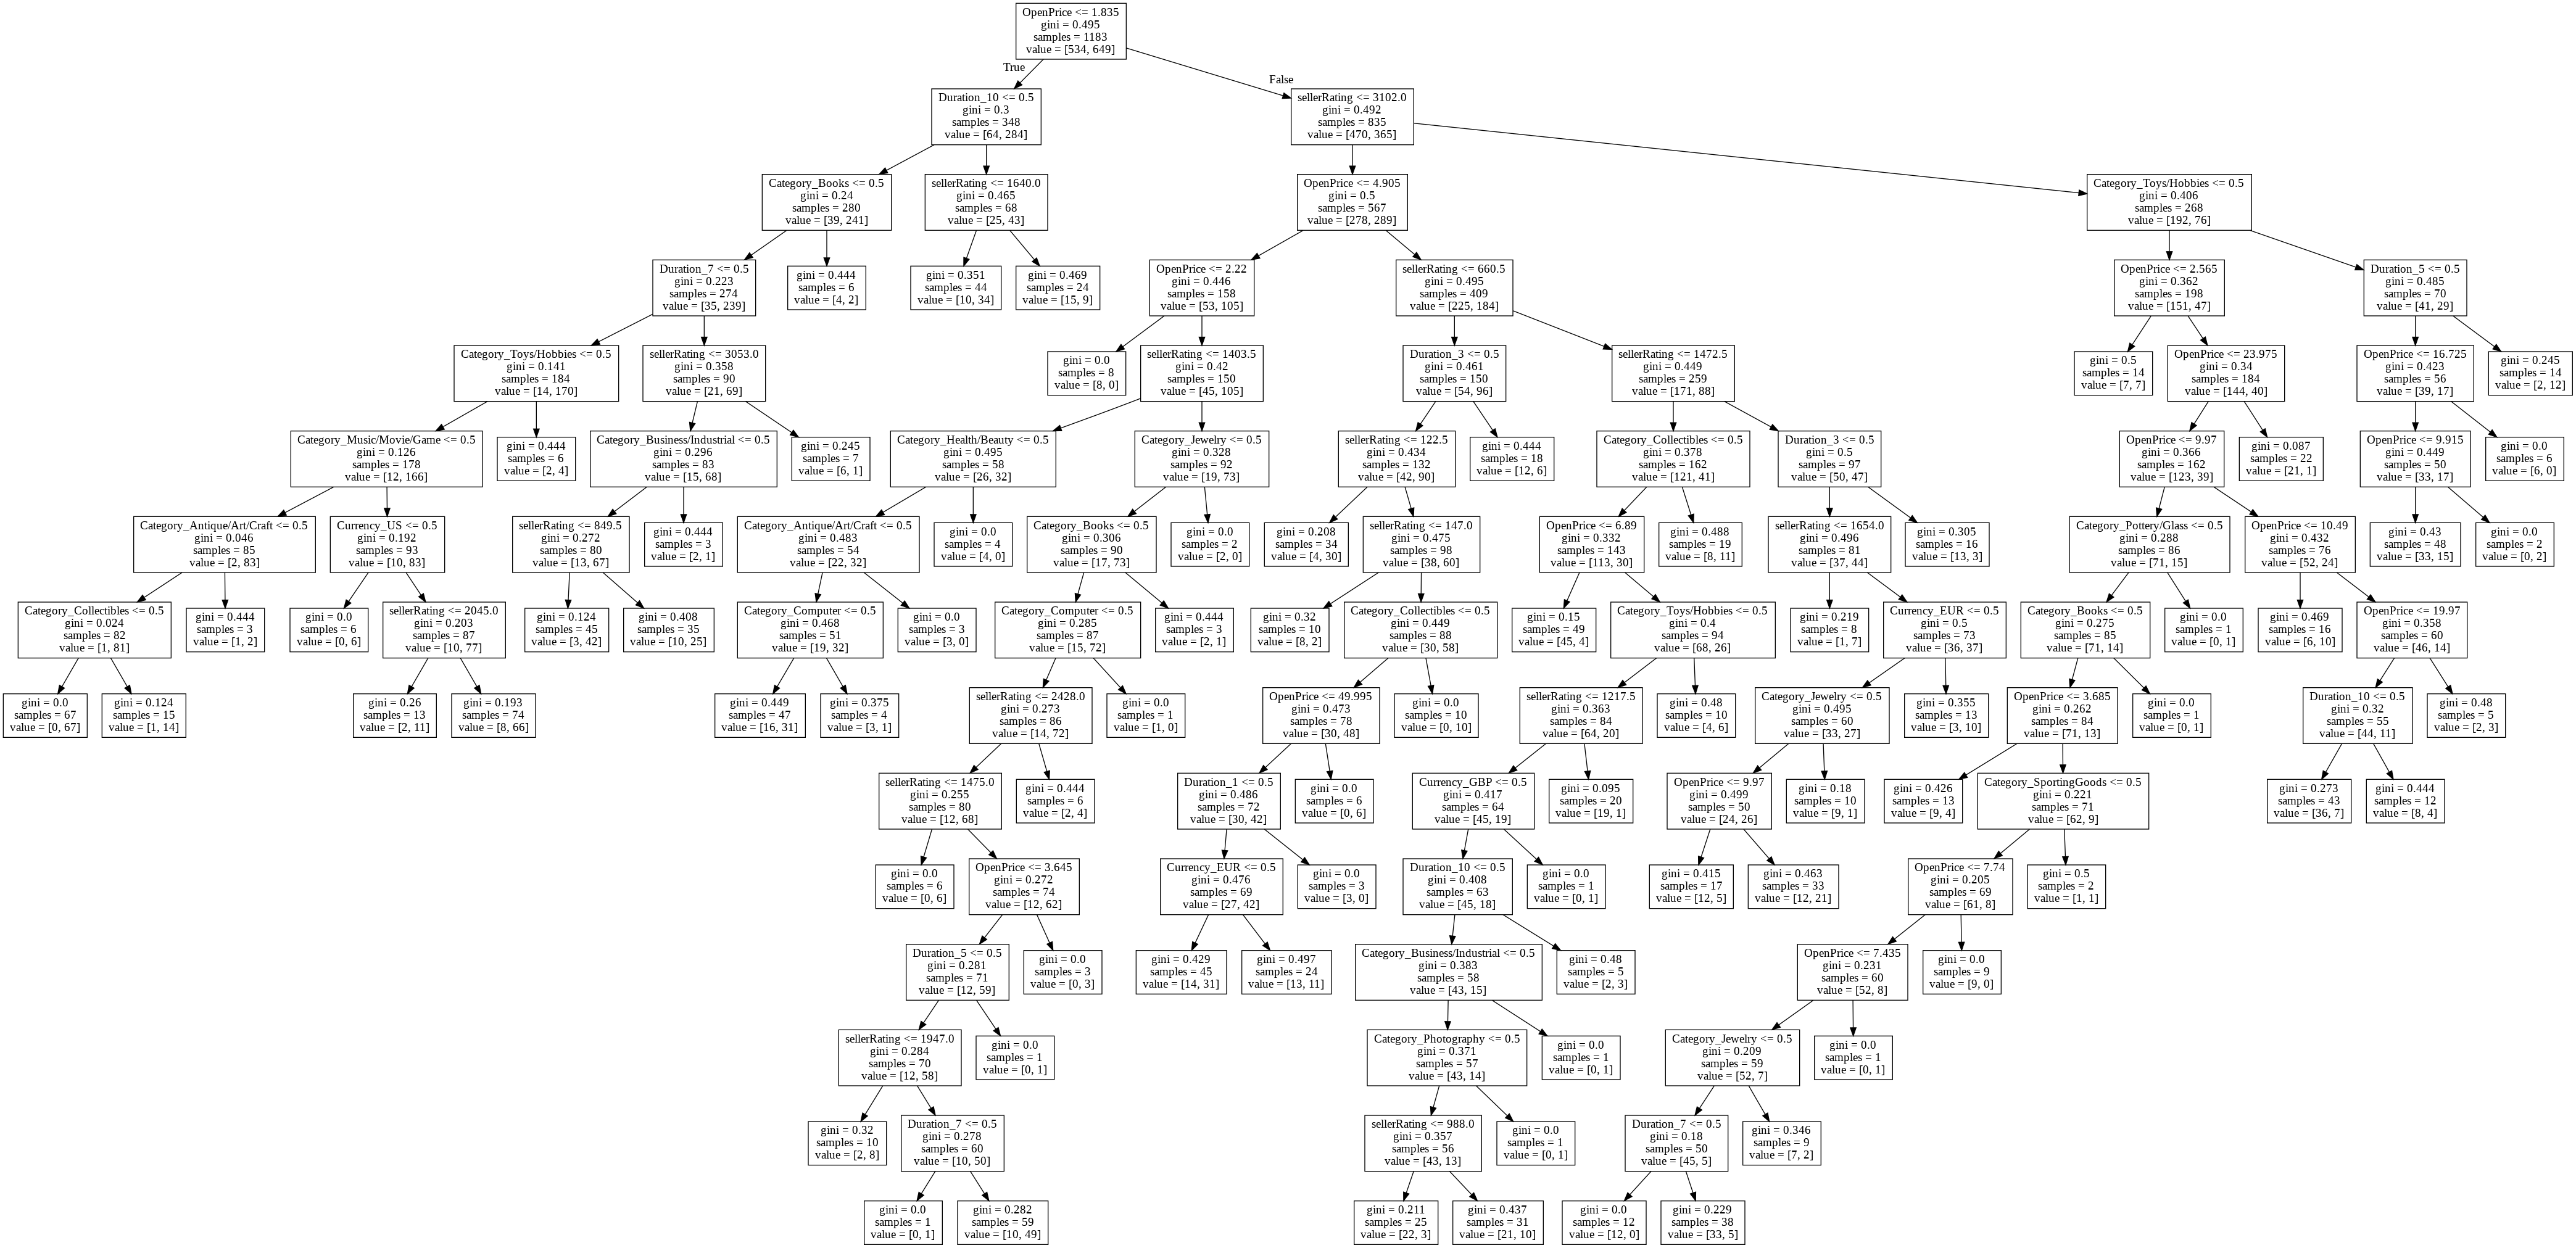

In [ ]:
dot_data = StringIO()
export_graphviz(dt2, out_file=dot_data, feature_names = x_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auctionTree1.png')
Image(graph.create_png())

In [ ]:
dt2.tree_.max_depth

14

In [ ]:
dt2.tree_.node_count

143

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(dt2.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
1,OpenPrice,0.4365
0,sellerRating,0.2822
27,Duration_10,0.0286
8,Category_Collectibles,0.0285
24,Duration_3,0.0282
25,Duration_5,0.0270
19,Category_Toys/Hobbies,0.0250
4,Category_Books,0.0244
14,Category_Jewelry,0.0224
20,Currency_EUR,0.0150


In [ ]:
#classification tree 
!pip install dmba
from dmba import classificationSummary
classificationSummary(y_test,dt2.predict(x_test))

     |████████████████████████████████| 11.8 MB 2.7 MB/s 
no display found. Using non-interactive Agg backend
Confusion Matrix (Accuracy 0.7174)

       Prediction
Actual   0   1
     0 246 126
     1  97 320


In [ ]:
classification_matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(classification_matrix,annot=True, cmap='Blues', fmt='g')
plt.title('Classification Matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show() 

In [ ]:
#precision TP / (TP + FP)
precision_score(y_test, y_pred)

0.7174887892376681

In [ ]:
#Recall (Sensitivity) TP / (TP + FN) 
recall_score(y_test, y_pred)

0.7673860911270983

In [ ]:
# f1 score TP/(TP + 0.5(FN+FP))
f1_score(y_test, y_pred)

0.7415990730011587

In [ ]:
# plot resulting tree. on a scatter plot: Use the two axes for the two best (quantitative) predictors
fig = plt.figure(figsize = (6,5))
fig.add_subplot(1,1,1)
sns.scatterplot('OpenPrice', 'sellerRating', hue='Competitive?', palette='muted', data=df_tree)
plt.title('plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:

x1 = np.log10(df_tree['OpenPrice'])
x2 = np.log10(df_tree['sellerRating'])
sns.scatterplot(x1, x2, hue='Competitive?', palette='muted', data=df_tree)
plt.title('Log plot of Competitiveness')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
#print out rules
r = export_text(dt2, feature_names=x_train.columns.values.tolist())
print(r)

|--- OpenPrice <= 1.84
|   |--- Duration_10 <= 0.50
|   |   |--- Category_Books <= 0.50
|   |   |   |--- Duration_7 <= 0.50
|   |   |   |   |--- Category_Toys/Hobbies <= 0.50
|   |   |   |   |   |--- Category_Music/Movie/Game <= 0.50
|   |   |   |   |   |   |--- Category_Antique/Art/Craft <= 0.50
|   |   |   |   |   |   |   |--- Category_Collectibles <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Category_Collectibles >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Category_Antique/Art/Craft >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Category_Music/Movie/Game >  0.50
|   |   |   |   |   |   |--- Currency_US <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Currency_US >  0.50
|   |   |   |   |   |   |   |--- sellerRating <= 2045.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- sellerRating >  2045.00
|   |   |   |   |  

In [ ]:
#feature importance
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(dt2.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
1,OpenPrice,0.4365
0,sellerRating,0.2822
27,Duration_10,0.0286
8,Category_Collectibles,0.0285
24,Duration_3,0.0282
25,Duration_5,0.0270
19,Category_Toys/Hobbies,0.0250
4,Category_Books,0.0244
14,Category_Jewelry,0.0224
20,Currency_EUR,0.0150


In [ ]:
# print out rules 
r = export_text(dt2, feature_names=x_train.columns.values.tolist())
print(r)

NameError: ignored

# **Model Tuning: Model3 Based on Model 2**

In [ ]:
predictor_importance = dt2.feature_importances_
imp_table = np.column_stack([x_train.columns, np.round(predictor_importance,4)])
imp_table = pd.DataFrame(imp_table,columns=["Variable","Importance"])
imp_table

,Variable,Importance
0,sellerRating,0.2822
1,OpenPrice,0.4365
2,Category_Antique/Art/Craft,0.011
3,Category_Automotive,0
4,Category_Books,0.0244
5,Category_Business/Industrial,0.0101
6,Category_Clothing/Accessories,0
7,Category_Coins/Stamps,0
8,Category_Collectibles,0.0285
9,Category_Computer,0.0102


In [ ]:
#Select top 5 predictors
n=5
imp_table.sort_values(["Importance"], ascending=False).iloc[:n,:]

,Variable,Importance
1,OpenPrice,0.4365
0,sellerRating,0.2822
27,Duration_10,0.0286
8,Category_Collectibles,0.0285
24,Duration_3,0.0282


In [ ]:
#Build tree with selected predictors:
model_predictors = ["OpenPrice", "sellerRating","Duration_10","Category_Collectibles", "Duration_3"]
np.random.seed(42)
model3 = DecisionTreeClassifier(min_samples_leaf=50)
x_train_new = x_train[model_predictors]
model3.fit(x_train_new,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#confusion matrix
x_test_new = x_test[model_predictors]
y_pred3 = model3.predict(x_test_new)
confusion_matrix(y_test,y_pred3)

array([[267, 105],
       [107, 310]])

In [ ]:
# classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       372
           1       0.75      0.74      0.75       417

    accuracy                           0.73       789
   macro avg       0.73      0.73      0.73       789
weighted avg       0.73      0.73      0.73       789



In [ ]:
#Accuracy rate
print("Accuracy:", accuracy_score(y_test,y_pred3))

Accuracy: 0.7313054499366286


In [ ]:
#precision TP / (TP + FP)
precision_score(y_test, y_pred3)

0.7469879518072289

In [ ]:
#Recall (Sensitivity) TP / (TP + FN) 
recall_score(y_test, y_pred3)

0.7434052757793765

In [ ]:
# f1 score TP/(TP + 0.5(FN+FP))
f1_score(y_test, y_pred3)

0.7451923076923077

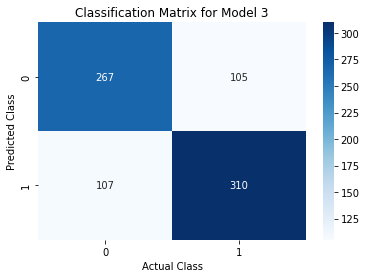

In [ ]:
classification_matrix= confusion_matrix(y_test, y_pred3)
sns.heatmap(classification_matrix,annot=True, cmap='Blues', fmt='g')
plt.title('Classification Matrix for Model 3')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.show() 

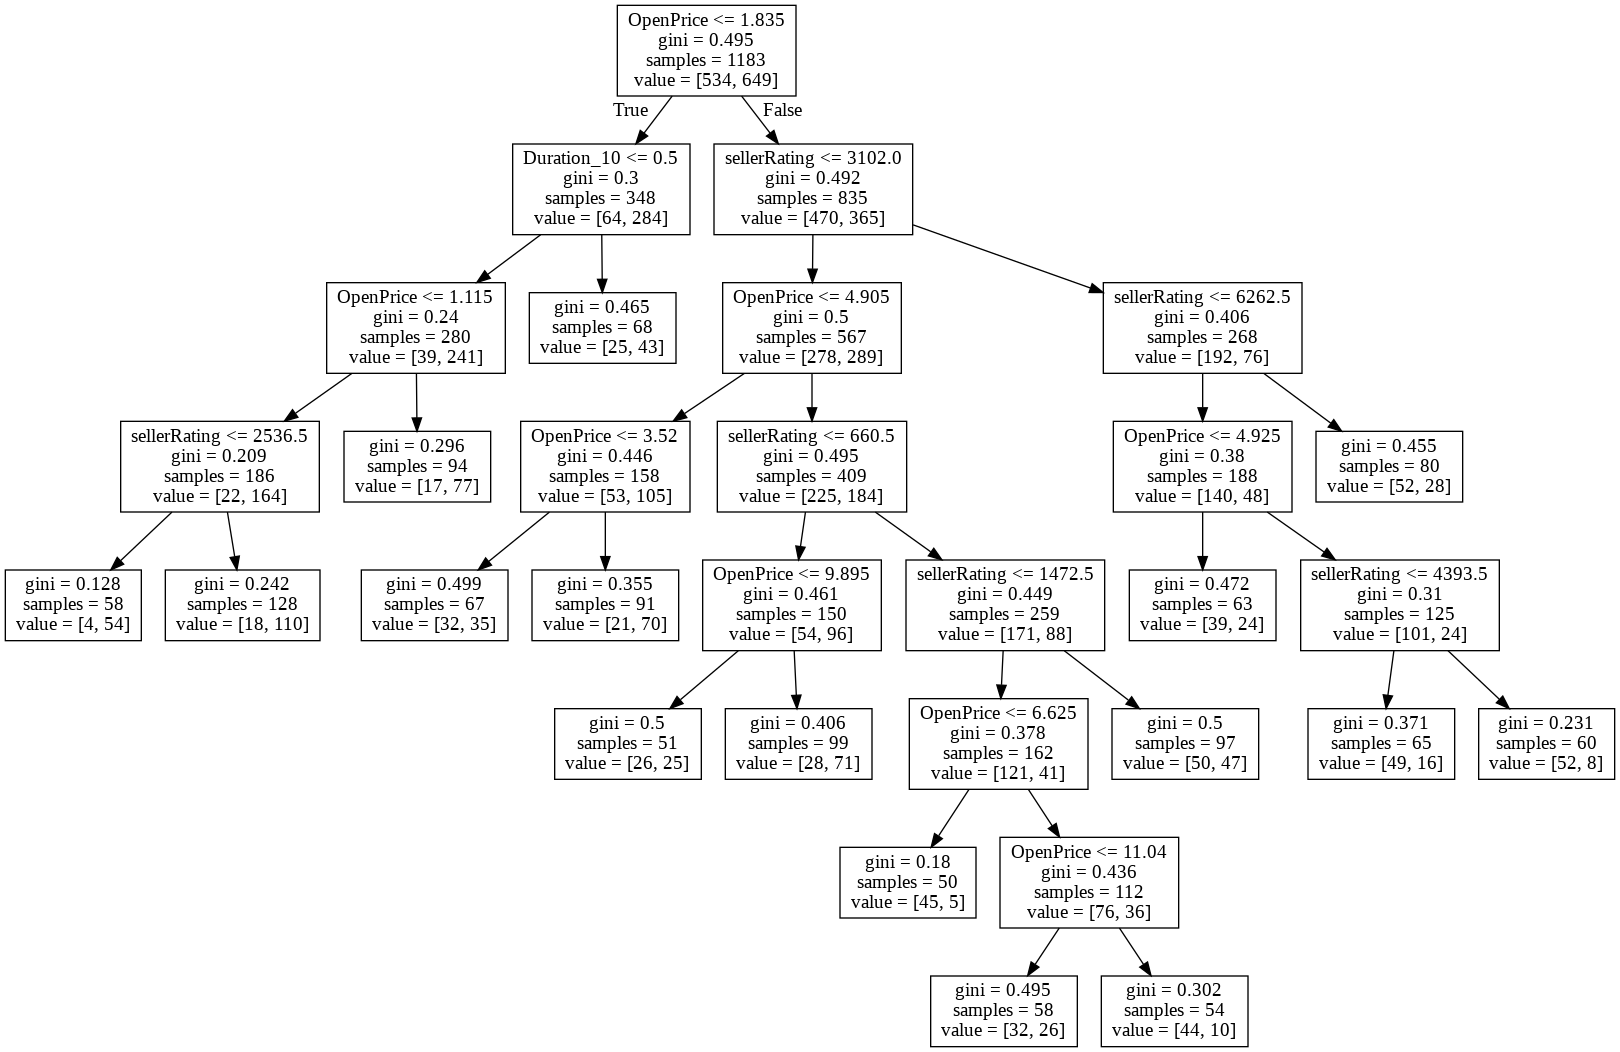

In [ ]:
dot_data = StringIO()
export_graphviz(model3, out_file=dot_data, feature_names = x_train_new.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('auctionTree2.png')
Image(graph.create_png())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


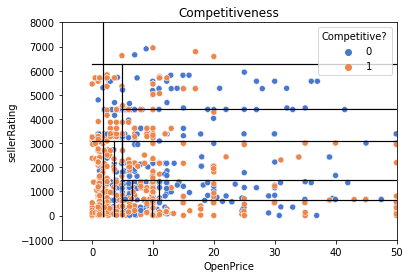

In [ ]:
#Scatter plot for seller rating and open price
ylim = 8000
xlim = 50
lwd=1.2
scatter=sns.scatterplot('OpenPrice', 'sellerRating', hue='Competitive?', palette='muted', data=df_tree)
scatter.set_xlim(left=-5, right=50)
scatter.set_ylim(bottom=-1000, top=8000);
plt.title('Competitiveness')
plt.plot([1.805, 1.805],[0, ylim],  c="black", linewidth=lwd)
plt.plot([0, xlim],[3102.0, 3102.0],  c="black", linewidth=lwd)
plt.plot([4.905, 4.905],[0, 3102.0],  c="black", linewidth=lwd)
plt.plot([3.52, 3.52],[0, 3102.0],  c="black", linewidth=lwd)
plt.plot([4.95,xlim],[660.5, 660.5],  c="black", linewidth=lwd)
plt.plot([9.895, 9.895],[0, 660.5],  c="black", linewidth=lwd)
plt.plot([4.95,xlim],[1472.5,1472.5],  c="black", linewidth=lwd)
plt.plot([6.625, 6.625],[660.5,1472.5],  c="black", linewidth=lwd)
plt.plot([11.04, 11.04],[660.5,1472.5],  c="black", linewidth=lwd)

plt.plot([0, xlim],[6262.5, 6262.5],  c="black", linewidth=lwd)
plt.plot([4.905, 4.905],[0, 6262.5],  c="black", linewidth=lwd)
plt.plot([4.905, xlim],[4393.5, 4394.5],  c="black", linewidth=lwd)
